# 修了課題　- 深層学習：前編１

### irisデータセットを利用したNNの構築　 -　versicolorの判別

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# irisデータセットの準備
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# irisデータセットの説明
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# データセットの形状
iris.data.shape

(150, 4)

In [5]:
# データセットをデータフレームに格納
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
#df.loc[df['target'] == 0, 'target'] = "setosa"
#df.loc[df['target'] == 1, 'target'] = "versicolor"
#df.loc[df['target'] == 2, 'target'] = "virginica"

In [6]:
# versicolor以外を0に置換
df = df.replace({'target':{2:0}})

In [7]:
df.shape

(150, 5)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [10]:
# 入力値を準備
df1 = df.drop(['petal length (cm)','petal width (cm)','target'], axis=1)
df1 = df1.T
# 目標値を準備
df2 = df['target']
df2 = df2.T

In [11]:
# サンプルデータを作成
data_sets_size = df.shape[0]
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    
    ## 入力値を設定
    data_sets[i]['x'] = df1[i].values
    
    # 目標出力を設定
    data_sets[i]['d'] = df2[i]

In [12]:
data_sets

[{'x': array([5.1, 3.5]), 'd': 0},
 {'x': array([4.9, 3. ]), 'd': 0},
 {'x': array([4.7, 3.2]), 'd': 0},
 {'x': array([4.6, 3.1]), 'd': 0},
 {'x': array([5. , 3.6]), 'd': 0},
 {'x': array([5.4, 3.9]), 'd': 0},
 {'x': array([4.6, 3.4]), 'd': 0},
 {'x': array([5. , 3.4]), 'd': 0},
 {'x': array([4.4, 2.9]), 'd': 0},
 {'x': array([4.9, 3.1]), 'd': 0},
 {'x': array([5.4, 3.7]), 'd': 0},
 {'x': array([4.8, 3.4]), 'd': 0},
 {'x': array([4.8, 3. ]), 'd': 0},
 {'x': array([4.3, 3. ]), 'd': 0},
 {'x': array([5.8, 4. ]), 'd': 0},
 {'x': array([5.7, 4.4]), 'd': 0},
 {'x': array([5.4, 3.9]), 'd': 0},
 {'x': array([5.1, 3.5]), 'd': 0},
 {'x': array([5.7, 3.8]), 'd': 0},
 {'x': array([5.1, 3.8]), 'd': 0},
 {'x': array([5.4, 3.4]), 'd': 0},
 {'x': array([5.1, 3.7]), 'd': 0},
 {'x': array([4.6, 3.6]), 'd': 0},
 {'x': array([5.1, 3.3]), 'd': 0},
 {'x': array([4.8, 3.4]), 'd': 0},
 {'x': array([5., 3.]), 'd': 0},
 {'x': array([5. , 3.4]), 'd': 0},
 {'x': array([5.2, 3.5]), 'd': 0},
 {'x': array([5.2, 3.4

##### 結果表示 #####


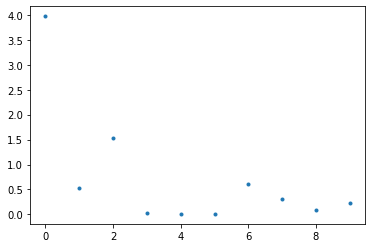

In [13]:
# どの種類のあやめ(yの値)を予想する

# シグモイド関数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# シグモイド関数の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

# 初期設定
def init_network():
    network = {}
    nodesNum = 3
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()
    return network

# 順伝播
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = sigmoid(u1)    
    u2 = np.dot(z1, W2) + b2
    y = u2     
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 10

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()